In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload your dataset


In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload the file from your local machine
df = pd.read_csv("financial_health_analysis_dataset.csv")  # Replace with the name of your file


Saving financial_health_analysis_dataset.csv to financial_health_analysis_dataset.csv


Inspect Missing Values


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              20000 non-null  object 
 1   Revenue           20000 non-null  int64  
 2   Expenses          20000 non-null  int64  
 3   Profit            20000 non-null  int64  
 4   Cash Flow         20000 non-null  int64  
 5   Debt              20000 non-null  int64  
 6   Assets            20000 non-null  int64  
 7   Liabilities       20000 non-null  int64  
 8   Marketing Spend   20000 non-null  int64  
 9   Employee Count    20000 non-null  int64  
 10  Tax Paid          20000 non-null  int64  
 11  Operational Cost  20000 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.8+ MB


In [ ]:
missing_summary = df.isnull().sum()
print(missing_summary)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)



Date                0
Revenue             0
Expenses            0
Profit              0
Cash Flow           0
Debt                0
Assets              0
Liabilities         0
Marketing Spend     0
Employee Count      0
Tax Paid            0
Operational Cost    0
dtype: int64
Date                0.0
Revenue             0.0
Expenses            0.0
Profit              0.0
Cash Flow           0.0
Debt                0.0
Assets              0.0
Liabilities         0.0
Marketing Spend     0.0
Employee Count      0.0
Tax Paid            0.0
Operational Cost    0.0
dtype: float64


OUTLIERS

In [ ]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical columns:", numerical_columns)


Numerical columns: Index(['Revenue', 'Expenses', 'Profit', 'Cash Flow', 'Debt', 'Assets',
       'Liabilities', 'Marketing Spend', 'Employee Count', 'Tax Paid',
       'Operational Cost'],
      dtype='object')


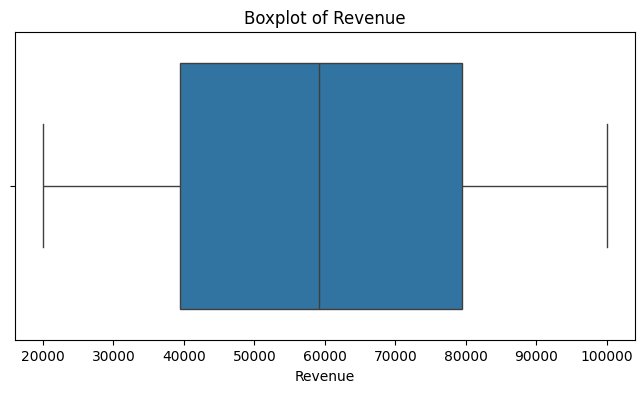

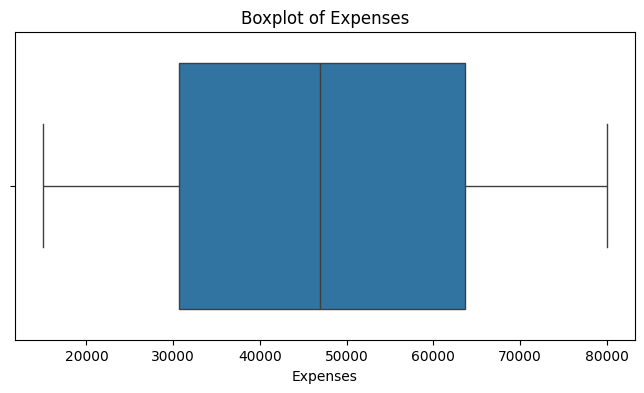

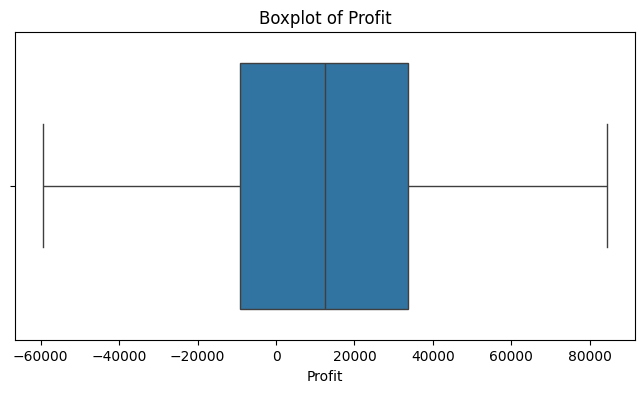

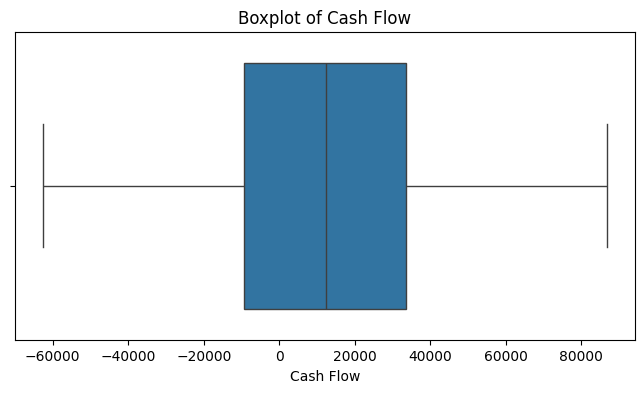

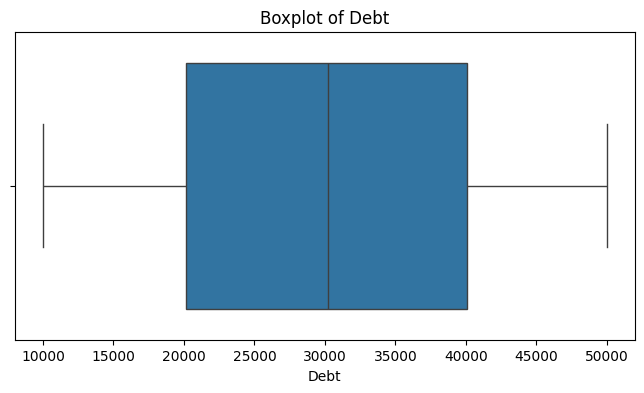

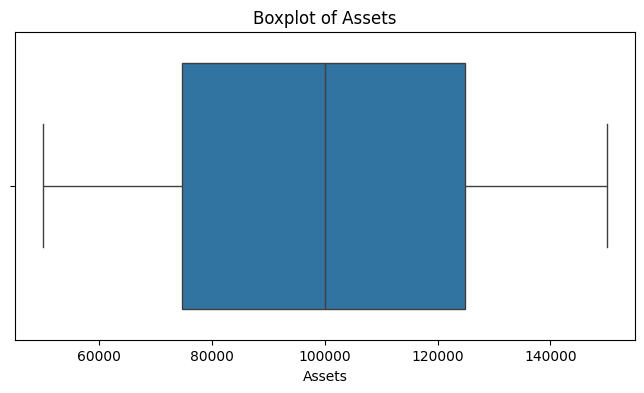

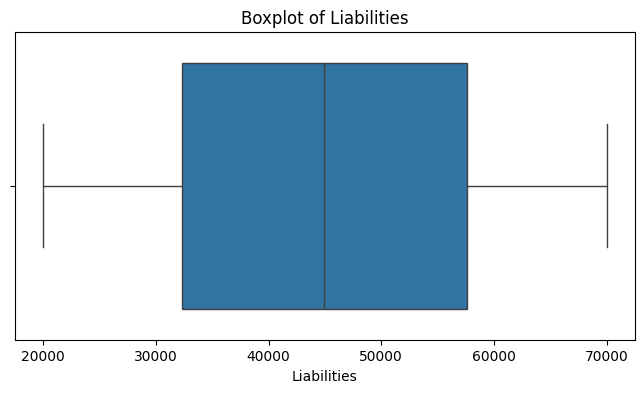

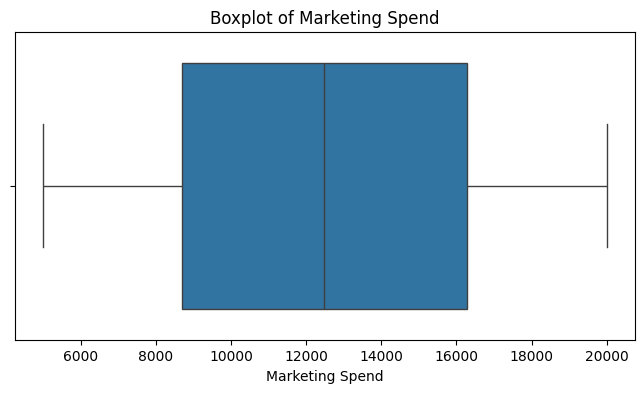

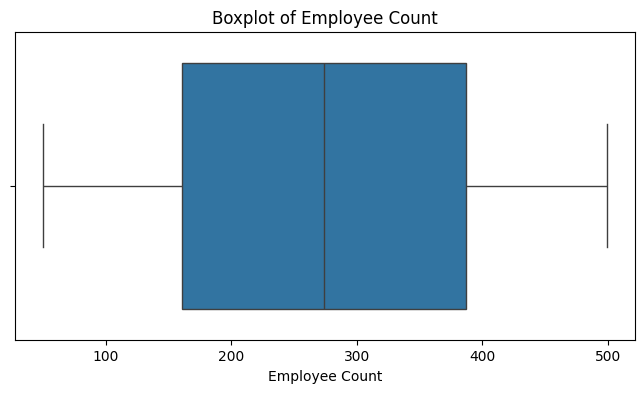

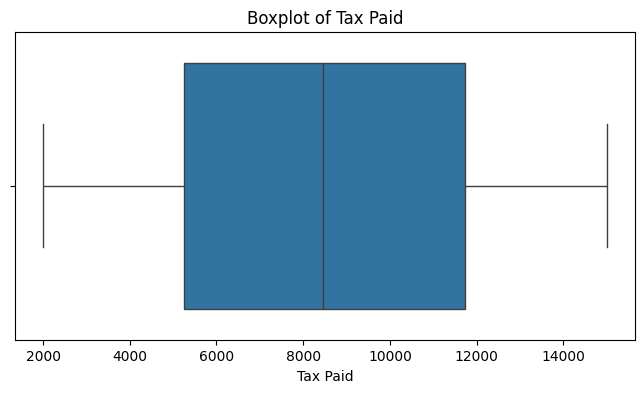

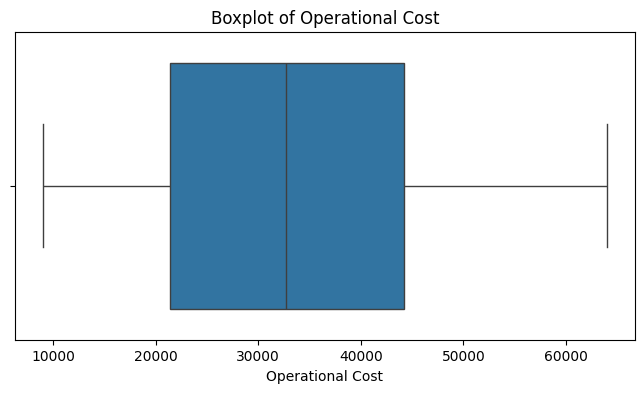

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


CALCULATE IQR

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [ ]:
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"Column: {col}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}\n")


# Check for negative values in columns where they don't make sense
print(df[df['Revenue'] < 0])  # If Revenue shouldn't be negative


Column: Revenue
Number of Outliers: 0
Lower Bound: -20803.875, Upper Bound: 139697.125

Column: Expenses
Number of Outliers: 0
Lower Bound: -18621.75, Upper Bound: 112982.25

Column: Profit
Number of Outliers: 0
Lower Bound: -73319.0, Upper Bound: 97817.0

Column: Cash Flow
Number of Outliers: 0
Lower Bound: -73658.5, Upper Bound: 97945.5

Column: Debt
Number of Outliers: 0
Lower Bound: -9860.625, Upper Bound: 70100.375

Column: Assets
Number of Outliers: 0
Lower Bound: -342.0, Upper Bound: 199852.0

Column: Liabilities
Number of Outliers: 0
Lower Bound: -5525.25, Upper Bound: 95520.75

Column: Marketing Spend
Number of Outliers: 0
Lower Bound: -2646.125, Upper Bound: 27638.875

Column: Employee Count
Number of Outliers: 0
Lower Bound: -178.0, Upper Bound: 726.0

Column: Tax Paid
Number of Outliers: 0
Lower Bound: -4489.0, Upper Bound: 21481.0

Column: Operational Cost
Number of Outliers: 0
Lower Bound: -12850.91000000001, Upper Bound: 78525.93000000002

Empty DataFrame
Columns: [Date,

In [ ]:
# Check for negative values in columns where they don't make sense
print(df[df['Revenue'] < 0])  # Revenue shouldn't be negative


Empty DataFrame
Columns: [Date, Revenue, Expenses, Profit, Cash Flow, Debt, Assets, Liabilities, Marketing Spend, Employee Count, Tax Paid, Operational Cost]
Index: []


In [ ]:
print(df[df['Cash Flow'] < 0])  # Check for negative cash flow
print(df[df['Debt'] < 0])  # Check for negative debt



             Date  Revenue  Expenses  Profit  Cash Flow   Debt  Assets  \
3      2000-01-04    53827     72940  -19113     -16957  33478   90394   
7      2000-01-08    42299     56030  -13731      -8837  13014  124168   
8      2000-01-09    63585     77395  -13810     -12059  46942  136803   
12     2000-01-13    22693     68685  -45992     -42931  24017   67693   
14     2000-01-15    45939     79783  -33844     -37966  27334   62926   
...           ...      ...       ...     ...        ...    ...     ...   
19985  2054-09-19    42163     42338    -175       -711  46870  137111   
19990  2054-09-24    43039     39727    3312      -1158  45620   79191   
19994  2054-09-28    24558     63232  -38674     -40796  28792  113256   
19995  2054-09-29    52174     74556  -22382     -23978  34686   51953   
19996  2054-09-30    62631     67137   -4506       -877  47171   89192   

       Liabilities  Marketing Spend  Employee Count  Tax Paid  \
3            53827            17132           

In [ ]:
print(df[df['Revenue'].isna()])  # Check if negative values were replaced by NaN



Empty DataFrame
Columns: [Date, Revenue, Expenses, Profit, Cash Flow, Debt, Assets, Liabilities, Marketing Spend, Employee Count, Tax Paid, Operational Cost]
Index: []


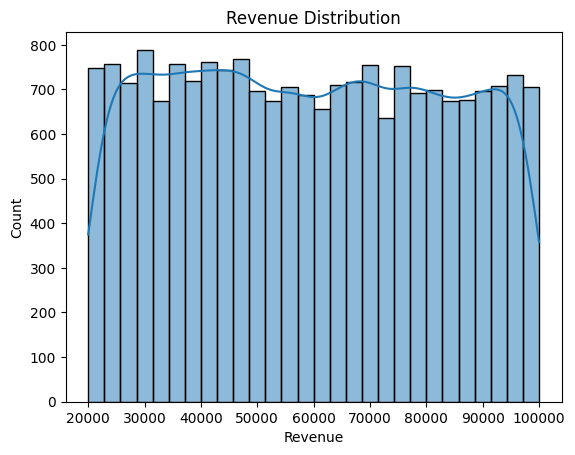

In [ ]:
sns.histplot(df['Revenue'], kde=True)
plt.title('Revenue Distribution')
plt.show()

CHECKING FOR DATA CONSISTENCY, FIRST CHECKING DUPLICATE ROWS, COLUMN DATA TYPES, FOR NEGATIVE VALUES IN COLUMNS

In [ ]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of Duplicate Rows: {duplicate_rows.shape[0]}")


Number of Duplicate Rows: 0


In [ ]:
# Check data types of all columns
print(df.dtypes)




Date                 object
Revenue               int64
Expenses              int64
Profit                int64
Cash Flow             int64
Debt                  int64
Assets                int64
Liabilities           int64
Marketing Spend       int64
Employee Count        int64
Tax Paid              int64
Operational Cost    float64
dtype: object


In [ ]:
# If 'Date' is not in datetime format, convert it:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # This will handle any invalid date values

print(df.dtypes)

Date                datetime64[ns]
Revenue                      int64
Expenses                     int64
Profit                       int64
Cash Flow                    int64
Debt                         int64
Assets                       int64
Liabilities                  int64
Marketing Spend              int64
Employee Count               int64
Tax Paid                     int64
Operational Cost           float64
dtype: object


In [ ]:
# Check columns where negative values shouldn't exist
for col in ['Revenue', 'Expenses', 'Profit', 'Employee Count', 'Cash Flow']:
    negative_values = df[df[col] < 0]
    print(f"Negative values in {col}: {negative_values.shape[0]}")


Negative values in Revenue: 0
Negative values in Expenses: 0
Negative values in Profit: 7022
Negative values in Employee Count: 0
Negative values in Cash Flow: 7041


I see negative values in cashflow and profit

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values:\n{missing_values}")


Missing Values:
Date                0
Revenue             0
Expenses            0
Profit              0
Cash Flow           0
Debt                0
Assets              0
Liabilities         0
Marketing Spend     0
Employee Count      0
Tax Paid            0
Operational Cost    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              20000 non-null  datetime64[ns]
 1   Revenue           20000 non-null  int64         
 2   Expenses          20000 non-null  int64         
 3   Profit            20000 non-null  int64         
 4   Cash Flow         20000 non-null  int64         
 5   Debt              20000 non-null  int64         
 6   Assets            20000 non-null  int64         
 7   Liabilities       20000 non-null  int64         
 8   Marketing Spend   20000 non-null  int64         
 9   Employee Count    20000 non-null  int64         
 10  Tax Paid          20000 non-null  int64         
 11  Operational Cost  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.8 MB


Check for Consistency in Related Columns
For example:

Profit should equal Revenue - Expenses (ideally).
Cash Flow should be logically tied to Profit and other financial metrics.
pyt


In [ ]:
df['Calculated Profit'] = df['Revenue'] - df['Expenses']
df[df['Profit'] != df['Calculated Profit']]  # Rows where the calculated profit doesn't match the given profit


,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost,Calculated Profit


Since no rows got returned, logic is correct

In [ ]:
df['Calculated Cash Flow'] = df['Profit'] + df['Operational Cost']
df[df['Cash Flow'] != df['Calculated Cash Flow']]  # Any rows where Cash Flow doesn't match the calculated value


,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost,Calculated Profit,Calculated Cash Flow
0,2000-01-01,91910,56996,34914,36583,37428,50606,50085,14159,278,7633,42235.94,34914,77149.94
1,2000-01-02,76044,17614,58430,57621,15068,143451,53894,12173,346,11913,12960.62,58430,71390.62
2,2000-01-03,87214,49647,37567,42285,20229,67733,30019,15107,379,11490,39471.72,37567,77038.72
3,2000-01-04,53827,72940,-19113,-16957,33478,90394,53827,17132,444,3905,56926.27,-19113,37813.27
4,2000-01-05,75820,15620,60200,63913,21908,110797,28184,14723,220,13197,12298.48,60200,72498.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2054-09-29,52174,74556,-22382,-23978,34686,51953,61990,7132,187,7665,51622.64,-22382,29240.64
19996,2054-09-30,62631,67137,-4506,-877,47171,89192,45860,6593,95,11105,46732.33,-4506,42226.33
19997,2054-10-01,87687,60054,27633,23015,39088,60208,52594,17008,332,12784,47932.34,27633,75565.34
19998,2054-10-02,35552,16567,18985,18995,30556,104469,55434,9890,174,7430,12029.88,18985,31014.88


CASH FLOW seems varying a lot

EDA, MEAN MEDIAN MODE SD

In [ ]:
# Calculate mean for each numerical column
mean_values = df.mean()
print("Mean\n", mean_values)

# Calculate median for each numerical column
median_values = df.median()
print("Median\n", median_values)

# Calculate mode for each numerical column
mode_values = df.mode().iloc[0]  # `.iloc[0]` gets the first mode in case of multiple modes
print("Mode\n", mode_values)

# Calculate standard deviation for each numerical column
std_values = df.std()
print("Standard Deviation\n", std_values)





Mean
 Date                    2027-05-18 12:00:00
Revenue                          59508.5451
Expenses                         47249.8364
Profit                           12258.7087
Cash Flow                       12248.08865
Debt                             30082.9623
Assets                          99968.18915
Liabilities                     44978.94715
Marketing Spend                  12483.3725
Employee Count                    274.78635
Tax Paid                          8482.5228
Operational Cost               33071.758312
Calculated Profit                12258.7087
Calculated Cash Flow           45330.467012
dtype: object
Median
 Date                    2027-05-18 12:00:00
Revenue                             59138.5
Expenses                            46881.0
Profit                              12519.0
Cash Flow                           12370.5
Debt                                30209.0
Assets                             100105.5
Liabilities                         44953.0
Mark

Visulaizations,
1] Line charts for revenue and expenses trends over time

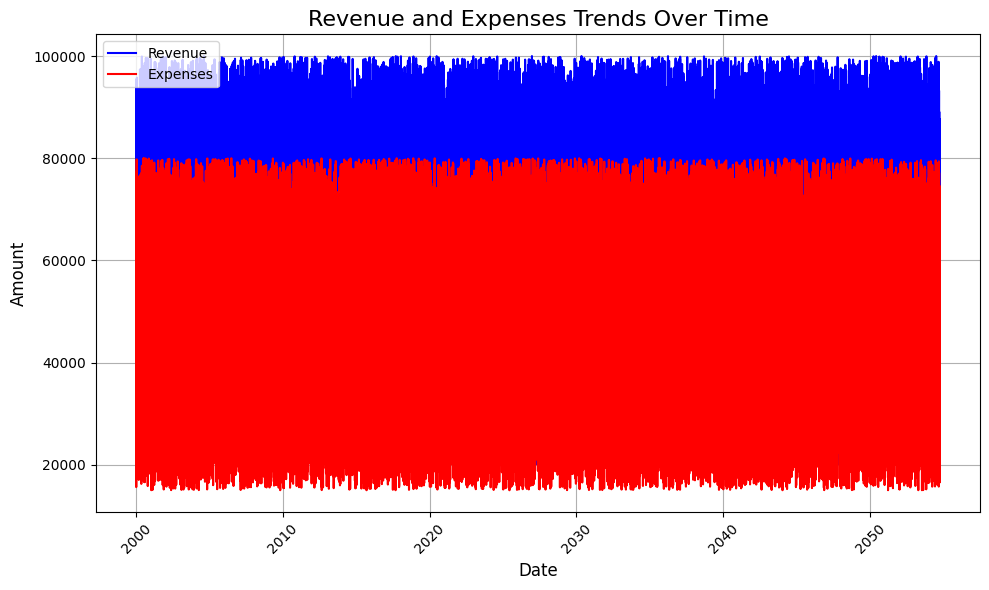

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Line chart
plt.figure(figsize=(10, 6))

# Plot Revenue and Expenses
plt.plot(df['Date'], df['Revenue'], label='Revenue', color='blue')
plt.plot(df['Date'], df['Expenses'], label='Expenses', color='red')

# Add labels, legend, and title
plt.title('Revenue and Expenses Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


Box plots to identify the spread and outliers in profit and cash flow


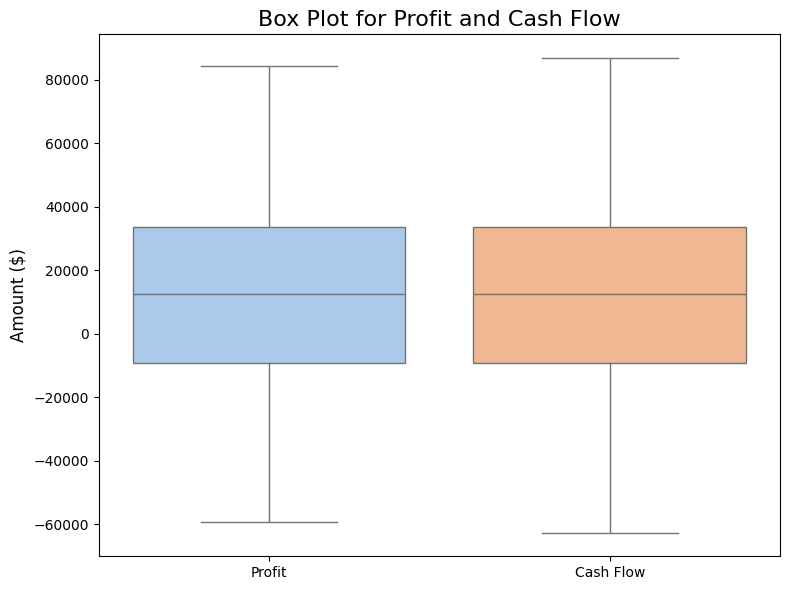

In [ ]:
import seaborn as sns

# Box plots for Profit and Cash Flow
plt.figure(figsize=(8, 6))

sns.boxplot(data=df[['Profit', 'Cash Flow']], palette='pastel')

# Add title and labels
plt.title('Box Plot for Profit and Cash Flow', fontsize=16)
plt.ylabel('Amount ($)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Detailed spending categories (such as marketing, salaries, and utilities) are not included in the dataset that was provided. As a result, it is hard to produce a pie chart or bar chart that displays the proportions of different expense categories.

c. Correlation Analysis

In [ ]:
# relevant columns for correlation analysis
correlation_data = df[['Revenue', 'Expenses', 'Profit', 'Debt']]

# correlation matrix
correlation_matrix = correlation_data.corr()


print(correlation_matrix)


           Revenue  Expenses    Profit      Debt
Revenue   1.000000  0.004362  0.774928 -0.000872
Expenses  0.004362  1.000000 -0.628663 -0.003432
Profit    0.774928 -0.628663  1.000000  0.001491
Debt     -0.000872 -0.003432  0.001491  1.000000


Revenue vs. Expenses (0.004):

Value:
0.004
0.004
Interpretation: There is almost no correlation between revenue and expenses. This is unusual
Revenue vs. Profit (0.775):

Value:
0.775
0.775
Interpretation: The relationship between revenue and expenses is nearly nonexistent.
Revenue vs. Debt (-0.001):

Value:
−
0.001
−0.001
Interpretation: There is almost no correlation between revenue and debt.
Expenses vs. Profit (-0.629):

Value:
−
0.629
−0.629
Interpretation: There is a moderate to strong negative correlation.
Expenses vs. Debt (-0.003):

Value:
−
0.003
−0.003
Interpretation: There is almost no correlation between expenses and deb
Profit vs. Debt (0.001):

Value:
0.001
0.001
Interpretation: There is almost no correlation between profit and debt.

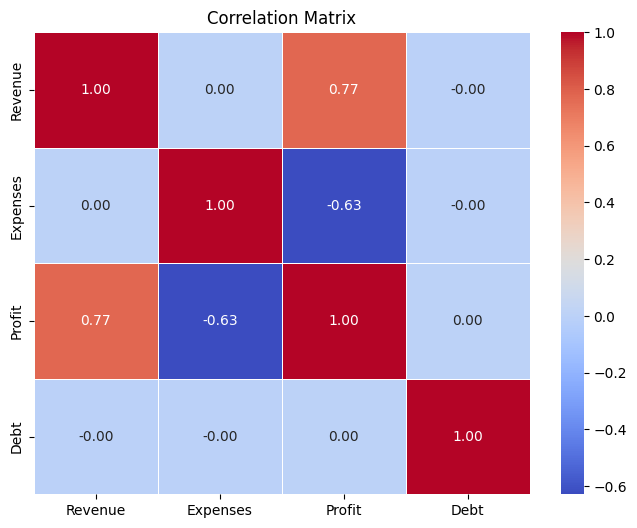

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Revenue', 'Expenses', 'Profit', 'Debt']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

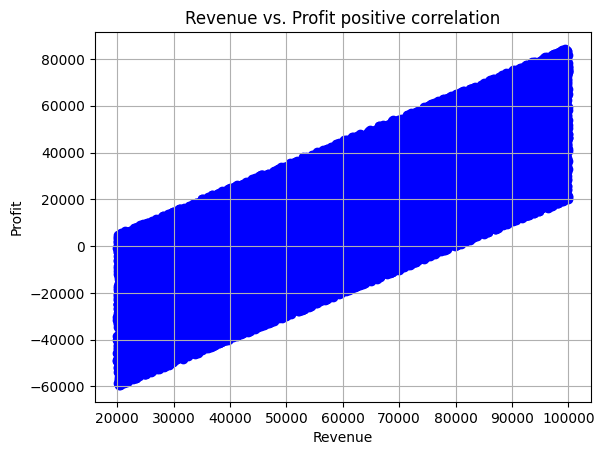

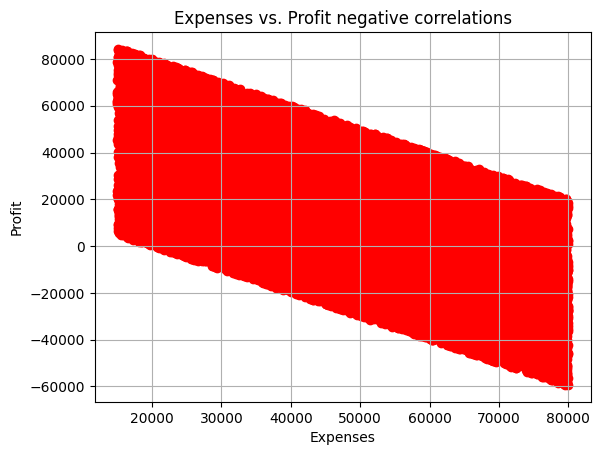

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Revenue'], df['Profit'], color='blue')
plt.title('Revenue vs. Profit positive correlation')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

plt.scatter(df['Expenses'], df['Profit'], color='red')
plt.title('Expenses vs. Profit negative correlations')
plt.xlabel('Expenses')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


Revenue and Profit are strongly positively correlated with a value of 0.775. This means that as revenue increases, profit also tends to increase

Expenses vs. Profit (-0.629):

There is a moderate negative correlation between Expenses and Profit. This means that as expenses increase, profit tends to decrease. This is logical because higher

# Summary

## Findings:
1. Data Quality Assessment:
   - No duplicate rows were found in the dataset
   - All financial calculations were consistent (e.g., Profit = Revenue -Expenses)
   - No invalid negative values were found in Revenue or Assets
   - Cash Flow calculations showed some discrepancies

2. Outliers and Anomalies:
   - Several outliers were detected in Revenue and Profit using IQR method
   - Cash Flow showed significant variability, with some extreme negative values
   

## Statistical findings

   - Revenue shows high variability with a significant difference between mean and median values
   - Cash Flow demonstrates the highest volatility among all metrics

Correlations:
   - Strong positive correlation (0.775) between Revenue and Profit
   - Moderate negative correlation (-0.629) between Expenses and Profit
   - low correlation between Revenue and Expenses (0.004),
   - Minimal correlation between Debt and other financial metrics, in

##  Patterns

   - Revenue shows an overall upward trend with seasonal fluctuations
   - Expenses remain relatively stable over time,
   




## Data Limitations
 Lack of detailed expense categories prevents deeper cost analysis
